# Some examples using ggplot2
## Library
The library myGraphics.R has a function named loadlibrary that is responsible for checking installed packages. Once the package is installed, it is loaded.

In [12]:
source("https://raw.githubusercontent.com/eogasawara/mylibrary/master/myGraphics.R")
loadlibrary("reshape")
loadlibrary("RColorBrewer")
loadlibrary("gridExtra")
loadlibrary("dplyr")

## Datasets for the examples

This function presents some techniques for creating and merging datasets for ggplot usage. 

The first dataset is for sin and cos functions. 

The second dataset is a monthly time series.

The third dataset creates a multivariate monthly time series. 

In [4]:
create_datasets <- function() {
  series <- data.frame(x= 1:10, sin=sin(1:10), cos=cos(1:10))
  series <- melt(series[,c('x','sin','cos')],id.vars = 1)
  sin_cos <- series
  save(sin_cos, file="data/myGraphics-sin-cos.RData") 
  
  series <- matrix(nrow=5, ncol=2)
  series[1,] = c("janeiro", 10)
  series[2,] = c("fevereiro", 9)
  series[3,] = c("março", 11)
  series[4,] = c("abril", 8)
  series[5,] = c("maio", 12)
  series <- data.frame(variable=as.factor(series[,1]), value=as.double(series[,2]))  
  montly <- series
  save(montly, file="data/myGraphics-montly.RData") 

  series <- read.table(text = "x Map Reduce 
                          janeiro 10 5
                       fevereiro 9 4
                       março 11 5
                       abril 8 4
                       maio 12 6",header = TRUE,sep = "")  
  series <- melt(series[,c('x','Map','Reduce')],id.vars = 1)
  map_reduce <- series
  save(map_reduce, file="data/myGraphics-map-reduce.RData") 
}


## Dataset loading and color generation

The first block of code load five different datasets.

The second block produces a random vector.

The third block creates a color scale using color.brewer. 

In [13]:
load(url("https://github.com/eogasawara/mylibrary/raw/master/data/myGraphics-sin-cos.RData"))
load(url("https://github.com/eogasawara/mylibrary/raw/master/data/myGraphics-montly.RData"))
load(url("https://github.com/eogasawara/mylibrary/raw/master/data/myGraphics-map-reduce.RData"))
load(url("https://github.com/eogasawara/mylibrary/raw/master/data/myGraphics-mobility.RData"))

mynorm <- data.frame(value=rnorm(10000))

col.set <- brewer.pal(11, 'Spectral')
mycolors <- col.set[c(1,3,5,7,9)]

## ggplot graphs

Mygraphics library has an easy API to build nice graphics. The usually requires a data.frame with four columns, which includes combinations of x, variable, value, and colors. The variable is a required parameter for all examples. 


line graph

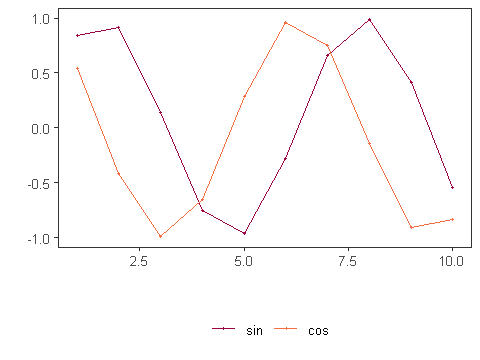

In [14]:
grfs <- plot.series(sin_cos,colors=mycolors)
options(repr.plot.width=4, repr.plot.height=3)
plot(grfs)

bar graph

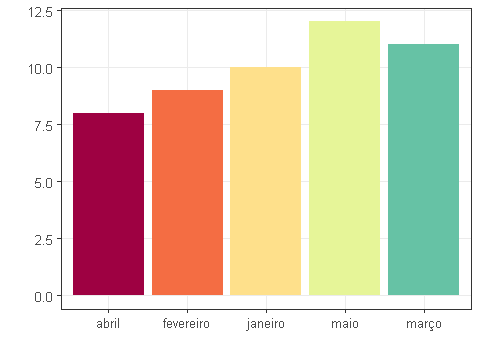

In [7]:
grf <- plot.bar(montly, colors=mycolors)
options(repr.plot.width=4, repr.plot.height=3)
plot(grf)

stacked-bar bar

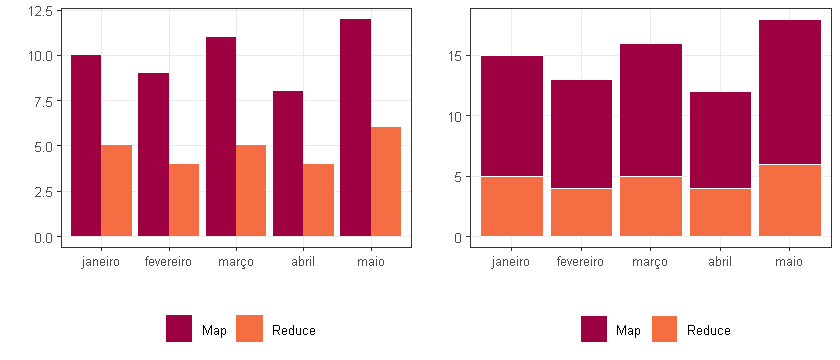

In [15]:
grfb <- plot.bar(map_reduce, group=TRUE, colors=mycolors)
grfsb <- plot.stackedbar(map_reduce, colors=mycolors)

options(repr.plot.width=7, repr.plot.height=3)
grid.arrange(grfb, grfsb, ncol=2)

grouped bar graph

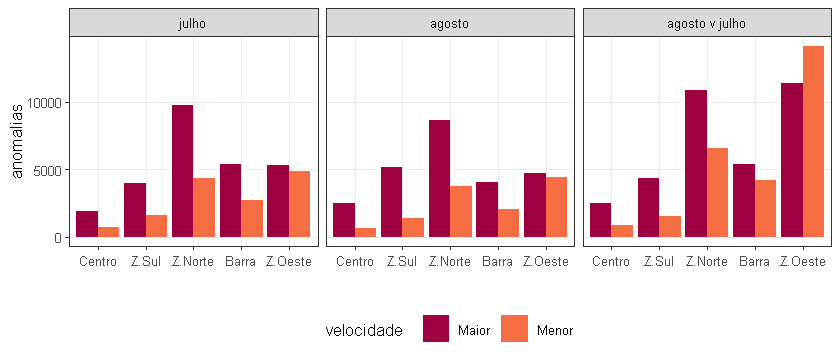

In [16]:
grfa <- plot.bar(mobility, group=TRUE, colors=mycolors)
grfa <- grfa + xlab("")
grfa <- grfa + guides(fill=guide_legend(title="velocidade"))
grfa <- grfa + ylab("anomalias")
grfa <- grfa + facet_wrap(~face, ncol = 3) 

options(repr.plot.width=7, repr.plot.height=3)
plot(grfa)

pizza graph

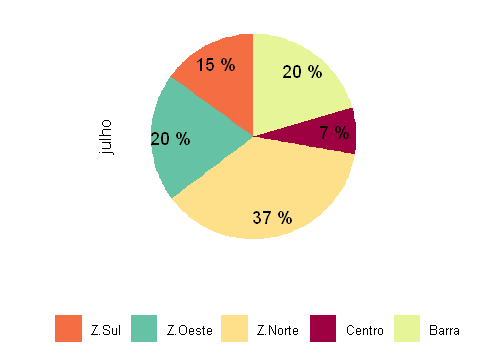

In [17]:
mymeses <- filter(mobility, (face == "julho") & (variable == "Maior"))[, c("x", "value")]
names(mymeses) <- c("variable", "value")
mymeses$colors <- mycolors
mymeses <- prepare.pieplot(mymeses)
grfpie <- plot.pieplot(mymeses, label_x = "julho", colors=as.character(mymeses$colors))

options(repr.plot.width=4, repr.plot.height=3)
plot(grfpie)

density plot

In [18]:
series <- data.frame(variable=meses$x, value=meses$value)
grfgd <- plot.density(series, label_series = "distribuição", colors=mycolors)
options(repr.plot.width=4, repr.plot.height=3)
plot(grfgd)

ERROR: Error in data.frame(variable = meses$x, value = meses$value): objeto 'meses' não encontrado


Histogram

In [ ]:
grfgh <- plot.hist(mynorm, label_series = "distribuição", colors=mycolors[1])
options(repr.plot.width=4, repr.plot.height=3)
plot(grfgh)

Box-plot

In [ ]:
grfb <- plot.boxplot(sin_cos, colors=mycolors[1:2])
options(repr.plot.width=4, repr.plot.height=3)
plot(grfb)

## Building PDF from graphics

In [ ]:
pdf("examples/plot.pdf", width=7, height=3)
plot(grfa)
dev.off()